# Adaptive Dialogue System considering emotional cues from users

In [1]:
# natural language processing block
import spacy
nlp = spacy.load('en_core_web_sm')
import string
punct = string.punctuation
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopwords

# creating a function for data cleaning
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:    # Stopwords and punctuation removal
      cleaned_tokens.append(token)
  return cleaned_tokens

c:\Users\Hoashalarajh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# sentiment analysis model
import pickle
# Load the saved model using pickle
with open('emotion_detector.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

C:\Users\Hoashalarajh\AppData\Local\Temp\ipykernel_12096\908153234.py:5: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  loaded_model = pickle.load(file)


In [3]:
# defining a fuction to change the topic based on emotional cue of the user
def topic_changing(sentence):
    prediction = loaded_model.predict(sentence)
    if prediction[0] == "negative":
        return "negative"
    else:
        return "positive"

In [4]:
# emotional cue based dialogue system
import random

class DialogueManager:
    def __init__(self):
        self.topics = {
            'sports': ["Football is a popular sport worldwide.", "Basketball requires great teamwork.", "Tennis is played with a racket and ball."],
            'news': ["There was a recent political scandal.", "The stock market experienced a significant drop.", "A new technology was launched."],
            'movies': ["The latest superhero movie is breaking box office records.", "An upcoming thriller film has everyone excited.", "A classic romance movie is being remade."]
        }
        self.current_topic = None
        # defining the number of interactions
        self.num_of_interactions = 0
        # a list to store the emotional state of the user
        self.emotional_state = []
        # storing user resonses
        self.user_responses = []



    def start_dialogue(self):
        print("Welcome to the dialogue manager! Let's talk about different topics.")
        self.change_topic()

        while True:
            user_input = input("You: ").strip().lower()
            # printing user response for particular robot response
            print (f"user: {user_input}")
            self.user_responses.append(user_input)
            sentence = [user_input]
            emotional_state = topic_changing(sentence)
            print (f"Entiment: {emotional_state}")

            if user_input == "exit":
                print("Goodbye!")
                break

            if (self.num_of_interactions >= 3):
                self.change_topic()
                self.num_of_interactions = 0
            else:
                self.display_random_info()
                self.num_of_interactions = self.num_of_interactions + 1
            
            # updating the emotional state of the user
            self.emotional_state.append(emotional_state)
            

    def change_topic(self):
        self.current_topic = random.choice(list(self.topics.keys()))
        print(f"Now let's talk about {self.current_topic}.")

    def display_random_info(self):
        if self.current_topic:
            random_info = random.choice(self.topics[self.current_topic])
            print(f"Bot: {random_info}")
        else:
            print("Bot: I'm not sure what topic we're discussing.")

if __name__ == "__main__":
    manager = DialogueManager()
    manager.start_dialogue()

# printing the emotions of the user
print ("The emotional state of the user is as belows:")
print (manager.emotional_state)
# printing the user responses
print (manager.user_responses)

Welcome to the dialogue manager! Let's talk about different topics.
Now let's talk about news.


user: okay fine sure we can talk about news
Entiment: negative
Bot: There was a recent political scandal.
user: ah fine it is good to hear
Entiment: positive
Bot: The stock market experienced a significant drop.
user: ah really good  to hear talk more about this
Entiment: positive
Bot: A new technology was launched.
user: it is really waesome and engaging
Entiment: positive
Now let's talk about sports.
user: fine we can
Entiment: positive
Bot: Football is a popular sport worldwide.
user: yeah i know it is very popular and i like footbal also
Entiment: positive
Bot: Basketball requires great teamwork.
user: yeah teamwork is a very good skill everone should have not only in sports but also to lead an awesome life
Entiment: positive
Bot: Football is a popular sport worldwide.
user: fine sure
Entiment: positive
Now let's talk about news.
user: fine we can
Entiment: positive
Bot: There was a recent political scandal.
user: oh really it is bad to hear
Entiment: negative
Bot: A new technology

In [5]:
emotion = manager.emotional_state
print (emotion)

['negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative']


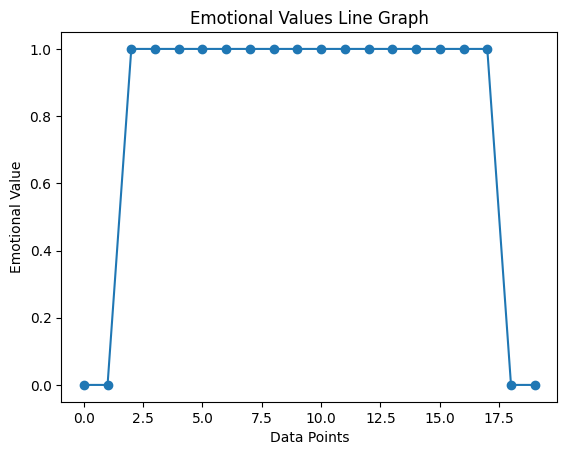

In [6]:
import matplotlib.pyplot as plt
def duplicate_elements(input_list):
    result_list = []
    for item in input_list:
        result_list.extend([item] * 2)
    return result_list

# Your list with "Positive" and "Negative" elements
emotional_list = duplicate_elements(manager.emotional_state)

# Convert emotional_list to a list of numerical values
numerical_values = [1 if value == "positive" else 0 for value in emotional_list]

# Create a line graph
plt.plot(numerical_values, marker='o')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Emotional Value')
plt.title('Emotional Values Line Graph')

# Display the graph
plt.show()


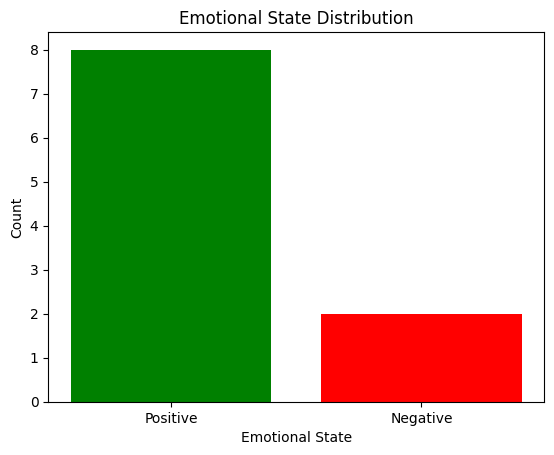

In [7]:
import matplotlib.pyplot as plt

# Your list with "Positive" and "Negative" elements
emotional_list = manager.emotional_state

# Count the occurrences of "Positive" and "Negative"
positive_count = emotional_list.count("positive")
negative_count = emotional_list.count("negative")

# Labels and counts for the bars
labels = ["Positive", "Negative"]
counts = [positive_count, negative_count]

# Create a bar graph
plt.bar(labels, counts, color=['green', 'red'])

# Adding labels and title
plt.xlabel('Emotional State')
plt.ylabel('Count')
plt.title('Emotional State Distribution')

# Display the graph
plt.show()


In [8]:
print (emotion)

['negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative']


## Metric Evaluation

### Utilizing the above data from the conversation we are going to calculate the following metrics 
#### Note: All metrics are scaled to 5
#### ===========================================================================================================================================
#####   (1) Mental State Quality (MSQ) = (Number of Positive Interactions / Total number of Interactions) * 5
#####   (2) Information Gathering Quality (IGQ) = (Number of new words in the interaction / Total number of words during the Interaction) * 5
#####   (3) Level of Interest (LOI) = (Number of lengthy responses with Positive emotional state / Total number of Interactions) * 5
#### ===========================================================================================================================================

In [9]:
# defining the mental state quality of the user
def mental_state_quality(sentence):
    emotion = sentence
    positive_mentality = emotion.count("positive")
    total_interactions = len(emotion)
    # computing MSQ
    return (positive_mentality/total_interactions)
# printing the mental state quality
MSQ = (mental_state_quality(manager.emotional_state)) * 5

In [10]:
# metric calulatior
def metric_eval(msq,igq,loi,w1,w2,w3):
    return((w1*msq + w2*igq + w3*loi)/(w1+w2+w3))

In [11]:
# calculating Level of Interest of the user (LoI)
def level_of_interest(sentence):
    length_of_response = 0
    res_len = []
    for i in sentence:
        sent = i.split(" ")
        res_len.append(len(sent))
        length_of_response += len(sent)
    # returning ratio of interaction which have words above averge reponse
    above_avg = 0
    for i in res_len:
        if i > (length_of_response / len(sentence)):
            above_avg += 1
    return (above_avg / len(res_len))

In [12]:
# computing Level of Interest
LOI = (level_of_interest(manager.user_responses)) * 5

In [13]:
# printing the LOI
print (f"Level of Interest is: {LOI}")

Level of Interest is: 1.8181818181818183


In [14]:
# calculating Information Gain Quality (IGQ)
def information_gain_quality(sentence):
    sample_sent = []
    total_words = 0
    unique_words = 0
    for i in sentence:
        sent = i.split(" ")
        sample_sent.append(sent)
    # Concatenate all words into a single list
    sample_sent = [word for sublist in sample_sent for word in sublist]
    total_words = len(sample_sent)
    sample_sent = set(sample_sent)
    unique_words = len(sample_sent)
    # returning the average response length
    return (unique_words / total_words)

In [15]:
# computing Information Gain Quakity (IGQ)
IGQ = (information_gain_quality(manager.user_responses)) * 5
print (IGQ)

2.9375


In [22]:
# viewing at once
print (f"Mental State Quality MSQ is: {MSQ:.02f}")
print (f"Information Gathering Quality IGQ is: {IGQ:.02f}")
print (f"Level of Interest LoI is: {LOI:.02f}")

Mental State Quality MSQ is: 4.00
Information Gathering Quality IGQ is: 2.94
Level of Interest LoI is: 1.82


In [23]:
# defining metric parameters
msq = MSQ
igq = IGQ
loi = LOI
w1 = 5
w2 = 3
w3 = 2
# computing and printing Interaction Quality Metric
IQM = metric_eval(msq,igq,loi,w1,w2,w3)
print (f"The Interaction Quality Metric (IQM) is: {IQM:.02f}")

The Interaction Quality Metric (IQM) is: 3.24


In [25]:
# Interpreting the IQM
def interpret_IQM(IQM):
    if (IQM >= 3.00):
        print (f"Value for Interaction Quality Metric is {IQM:.02f}: Quality of Interaction is GOOD. Keep it Up MIRob")
    else:
        print (f"Value for Interaction Quality Metric is {IQM:.02f}: Quality of Interaction is BAD. You need to imporve MIRob")

# calling the function to get the interpretation
interpret_IQM(IQM)

Value for Interaction Quality Metric is 3.24: Quality of Interaction is GOOD. Keep it Up MIRob


## Extracting triplets from sentences

In [12]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# importing networkx library
import networkx as nx

# importing matplotlib for plotting knowldge graphs
import matplotlib.pyplot as plt

In [53]:
# Sample sentences
sentences = [
    "Kasun love reading poetry",
    "Kasun am now eating rice.",
    "Today Kasun had exam.",
    "Kasun learn physics from Mohan",
    "Kasun like play cricket",
    "Kasun will be visiting  Sigiriya"
]

# Function to extract subject-action-object triples
def extract_triplets(sentence):
    triplets = []
    doc = nlp(sentence)
    
    for chunk in doc.noun_chunks:
        if chunk.root.dep_ == "nsubj" and chunk.root.head.dep_ == "ROOT":
            subject = chunk.text
            action = chunk.root.head.text
            obj = [child.text for child in chunk.root.head.rights if child.dep_ == "dobj"]
            if obj:
                obj = obj[0]
                triplets.append((subject, action, obj))
    
    return triplets

# Extract and print triples from each sentence
for sentence in sentences:
    triples = extract_triplets(sentence)
    if triples:
        print(triples)
    else:
        print("No triples found in:", sentence)


[('Kasun', 'love', 'poetry')]
[('Kasun', 'eating', 'rice')]
[('Kasun', 'had', 'exam')]
[('Kasun', 'learn', 'physics')]
[('Kasun', 'play', 'cricket')]
[('Kasun', 'visiting', 'Sigiriya')]


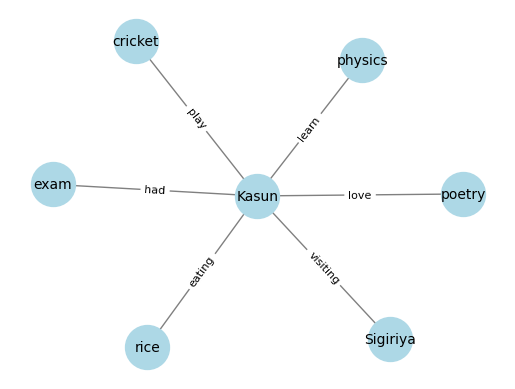

In [54]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Extract triples and add nodes and edges to the graph
for sentence in sentences:
    triples = extract_triplets(sentence)
    for triplet in triples:
        subject, action, obj = triplet
        G.add_node(subject)
        G.add_node(obj)
        G.add_edge(subject, obj, action=action)

# Draw the knowledge graph
pos = nx.spring_layout(G, seed=42)  # Adjust layout for better visualization

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=False)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

edge_labels = {(u, v): d['action'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis('off')
plt.show()